In [159]:
!pip install numpy
!pip install matplotlib
!pip install scipy


# from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
# from pylab import *

init_printing()

In [163]:
class rocket:
    # constructor
    def __init__(self, m_dry, m_prop, mass_flow, burntime, isp, cd, diameter):
        
        # user defined rocket
        self._m_dry = m_dry
        self._m_prop = m_prop
        self._mass_flow = mass_flow
        self._burntime = burntime
        self._isp = isp
        self._cd = cd
        self._d = diameter
        
        # calculate area of rocket
        self._area = np.pi * (self._d/2)**2
        self._ugly_mass_flow = mass_flow

        # calculate propellant mass of rocket
        # self._m_prop = mass_flow * burntime

        # self.state_variables
    
    def _mass(self, t): 
        if t < self._burntime:
            mass = self._m_dry + self._m_prop - self._ugly_mass_flow * t #ugly
            # print("omgt: ", str(t), " m: ", str(mass))
            return mass
        else:
            self._mass_flow = 0 
            mass = self._m_dry
            return mass 
    
    # for troposphere so altitude < 36152 https://www.grc.nasa.gov/www/k-12/airplane/atmos.html
    # def _air_density(self, altitude):
    #     T = 59 - 0.00356 * altitude # temperature at that level
    #     p = 2116 * ((T + 459.7)/518.6)**5.256
    #     rho = p / (1718 (T + 459.7)) * 32.174 # converting from slugs/ft^3 to lb/ft^3
    #     return rho
        
    def _vectorfield(self, state, t):
        #state
        v, p = state
        
        # parameters        
        rho = 0.0765 
        
        # relations H&H, and aero. 
        f = [((self._isp * self._mass_flow * 9.8) - (self._mass(t) * 9.8) - (self._cd * rho * v**2 * np.pi* (self._d/2)**2/2) 
              - self._mass_flow * v)/self._mass(t),
             v] 
        
        return f
    
    def altitude(self):
        # initial conditions
        
        v0 = 0
        p0 = 0
        w0 = [v0, p0]
        
        stoptime = 100
        numpoints = 200
        # abserr = 1.0e-8
        # relerr = 1.0e-6
        

        t = [ stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
        
        solution = odeint(self._vectorfield, w0, t)  #, atol = abserr, rtol = relerr)
        
        v = solution[:, 0]
        p = solution[:, 1]
        m = []
        
        for i in range(len(t)):
            m.append(self._mass(i))
            print("t: %6.2f, p: %8.2f, v: %8.2f, m: %6.2f" % (t[i], p[i], v[i], m[-1]))
        plt.plot(t, v)
        plt.show()
        plt.plot(t, p)
        plt.show()
        plt.plot(t, m)
        plt.show()
        
        return solution

t:   0.00, p:     0.00, v:     0.00, m:  70.00
t:   0.50, p:    11.15, v:    44.37, m:  67.49
t:   1.01, p:    44.59, v:    88.74, m:  64.98
t:   1.51, p:   100.32, v:   133.02, m:  62.47
t:   2.01, p:   178.26, v:   177.12, m:  59.96
t:   2.51, p:   278.28, v:   220.93, m:  57.45
t:   3.02, p:   400.23, v:   264.37, m:  54.94
t:   3.52, p:   543.90, v:   307.32, m:  52.43
t:   4.02, p:   709.01, v:   349.71, m:  49.92
t:   4.52, p:   895.25, v:   391.43, m:  47.41
t:   5.03, p:  1102.27, v:   432.38, m:  44.91
t:   5.53, p:  1329.66, v:   472.49, m:  44.91
t:   6.03, p:  1576.98, v:   511.65, m:  44.91
t:   6.53, p:  1843.71, v:   549.79, m:  44.91
t:   7.04, p:  2129.35, v:   586.84, m:  44.91
t:   7.54, p:  2433.31, v:   622.72, m:  44.91
t:   8.04, p:  2754.99, v:   657.37, m:  44.91
t:   8.54, p:  3093.77, v:   690.74, m:  44.91
t:   9.05, p:  3448.98, v:   722.77, m:  44.91
t:   9.55, p:  3819.94, v:   753.42, m:  44.91
t:  10.05, p:  4205.41, v:   771.91, m:  44.91
t:  10.55, p:

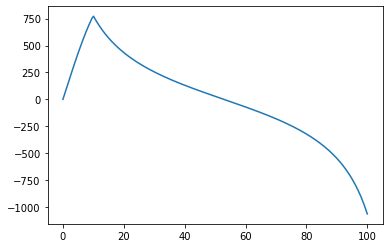

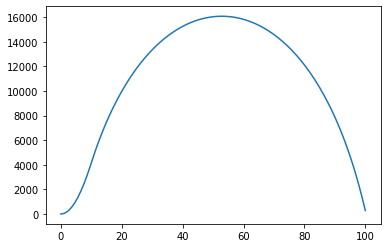

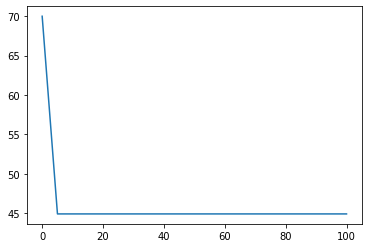

In [164]:
# making and launching rocket

m_prop = 25.09 # lb
m_dry = 70.0 - m_prop
mass_flow = 2.51 
burntime = 10
isp = 279
cd = 0.6
diameter = 5 / 12 # ft

spark = rocket(m_dry, m_prop, mass_flow, burntime, isp, cd, diameter)
x  = spark.altitude()
# spark._mass(9.99999999)

# x[:,0
